#Analisis Data Sales di Ecommerce

Tujuan :

*   Untuk mendapatkan infomasi trend penjualan berdasar waktu, platform, kota dan lain-lain



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Impor Dataset

In [2]:
df = pd.read_csv('ecommerce_10000.csv')
df

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      10000 non-null  object 
 1   Product      10000 non-null  object 
 2   Category     10000 non-null  object 
 3   Brand        10000 non-null  object 
 4   Platform     10000 non-null  object 
 5   City         10000 non-null  object 
 6   Price        10000 non-null  float64
 7   Quantity     10000 non-null  int64  
 8   TotalAmount  10000 non-null  float64
 9   Rating       10000 non-null  float64
 10  Reviews      10000 non-null  int64  
 11  OrderDate    10000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 937.6+ KB


#Pengecekan Struktur Data

In [4]:
#Mengganti tipe data OrderDate dari object ke date
#Mengkonversi dulu ke datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      10000 non-null  object        
 1   Product      10000 non-null  object        
 2   Category     10000 non-null  object        
 3   Brand        10000 non-null  object        
 4   Platform     10000 non-null  object        
 5   City         10000 non-null  object        
 6   Price        10000 non-null  float64       
 7   Quantity     10000 non-null  int64         
 8   TotalAmount  10000 non-null  float64       
 9   Rating       10000 non-null  float64       
 10  Reviews      10000 non-null  int64         
 11  OrderDate    10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 937.6+ KB


In [6]:
df.isnull().sum()

,0
OrderID,0
Product,0
Category,0
Brand,0
Platform,0
City,0
Price,0
Quantity,0
TotalAmount,0
Rating,0


In [7]:
df.duplicated().sum()

np.int64(0)

#Exploratory Data Analysis

In [8]:
df.head()

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19


In [9]:
df['Month'] = df['OrderDate'].dt.strftime('%b')

In [10]:
df['Date'] = df['OrderDate'].dt.day

In [11]:
df['Day'] = df['OrderDate'].dt.day_name()

In [12]:
df.head()

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate,Month,Date,Day
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11,Nov,11,Monday
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22,Jun,22,Saturday
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27,May,27,Monday
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25,Jul,25,Thursday
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19,Feb,19,Monday


In [13]:
df['Rating'].describe()

,Rating
count,10000.000000
mean,3.005592
std,1.154845
min,1.000000
25%,2.010000
50%,3.005000
75%,4.000000
max,5.000000


In [14]:
a = df['Rating']


In [15]:
df['Reviews'].describe()

,Reviews
count,10000.000000
mean,2520.072200
std,1443.849734
min,0.000000
25%,1275.000000
50%,2537.500000
75%,3767.000000
max,5000.000000


In [16]:
df['Brand'].unique()

array(['Samsung', 'Nike', 'JBL', 'HP', 'Apple', 'Generic', 'FitPro',
       'Xiaomi', 'Dell', 'Adidas'], dtype=object)

In [17]:
df['City'].unique()

array(['Cairo', 'Alexandria', 'Casablanca', 'Dubai', 'Riyadh', 'Giza'],
      dtype=object)

In [18]:
df['Category'].unique()

array(['Electronics', 'Fashion', 'Accessories', 'Computers', 'Wearables'],
      dtype=object)

In [19]:
df['OrderID'].unique()

array(['ORD100000', 'ORD100001', 'ORD100002', ..., 'ORD109997',
       'ORD109998', 'ORD109999'], dtype=object)

In [20]:
df['Platform'].unique()

array(['Souq', 'Jumia', 'Amazon'], dtype=object)

In [21]:
df['Price'].unique()

array([16284.02,  6645.2 ,  8882.92, ...,  8646.2 ,  4960.53, 13811.49])

In [22]:
df['Product'].unique()

array(['Samsung Galaxy A14', 'Nike Air Max', 'Bluetooth Headset',
       'HP Pavilion Laptop', 'iPhone 13', 'T-shirt Cotton',
       'Smartwatch FitPro', 'Xiaomi Redmi Note 12', 'Dell Inspiron 3501',
       'Adidas Running Shoes'], dtype=object)

In [23]:
df['Quantity'].unique()

array([1, 2, 3, 5, 4])

[Text(0, 0, '894'),
 Text(0, 0, '878'),
 Text(0, 0, '871'),
 Text(0, 0, '858'),
 Text(0, 0, '855'),
 Text(0, 0, '855'),
 Text(0, 0, '841'),
 Text(0, 0, '832'),
 Text(0, 0, '827'),
 Text(0, 0, '788'),
 Text(0, 0, '775'),
 Text(0, 0, '726')]

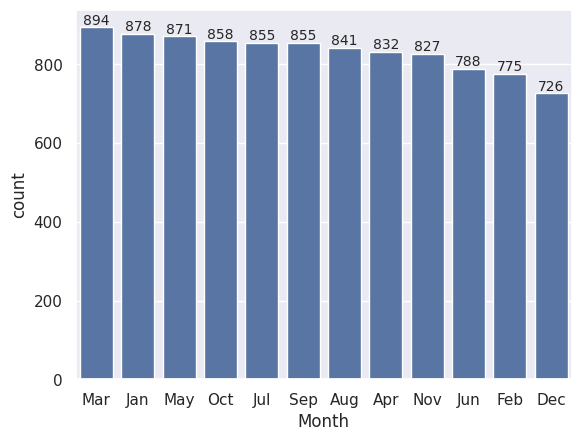

In [24]:
ax = sns.barplot(df['Month'].value_counts(),errorbar= None)
sns.set_context('notebook') #mengatur ukuran huruf (pilihan : paper, notebook, talk, poster)
ax.bar_label(ax.containers[0],fontsize=10)


In [25]:
cat = df['Category'].value_counts()
cat

,count
Category,
Electronics,3028
Fashion,2970
Computers,1953
Accessories,1029
Wearables,1020


[Text(0, 0, '3,028'),
 Text(0, 0, '2,970'),
 Text(0, 0, '1,953'),
 Text(0, 0, '1,029'),
 Text(0, 0, '1,020')]

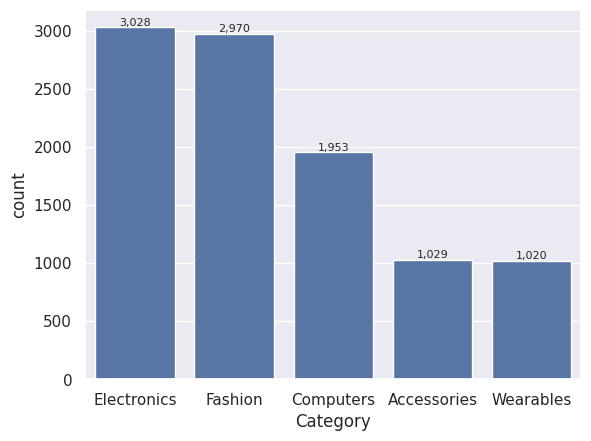

In [26]:
bx = sns.barplot(cat)
bx.bar_label(bx.containers[0],fontsize=8, fmt='{:,.0f}')

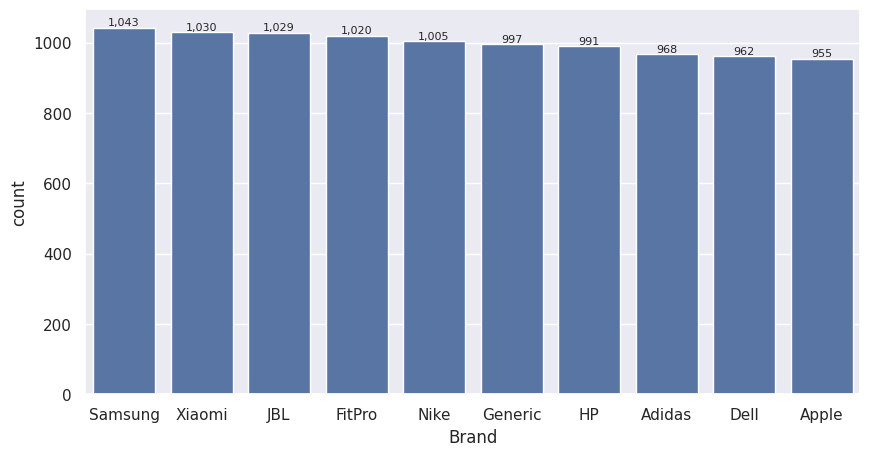

In [27]:
from matplotlib import figure
plt.figure(figsize=(10, 5))
cx = sns.barplot(df['Brand'].value_counts())
cx.bar_label(cx.containers[0],fontsize=8, fmt='{:,.0f}')
sns.set_context('paper') #mengatur ukuran huruf (pilihan : paper, notebook, talk, poster)



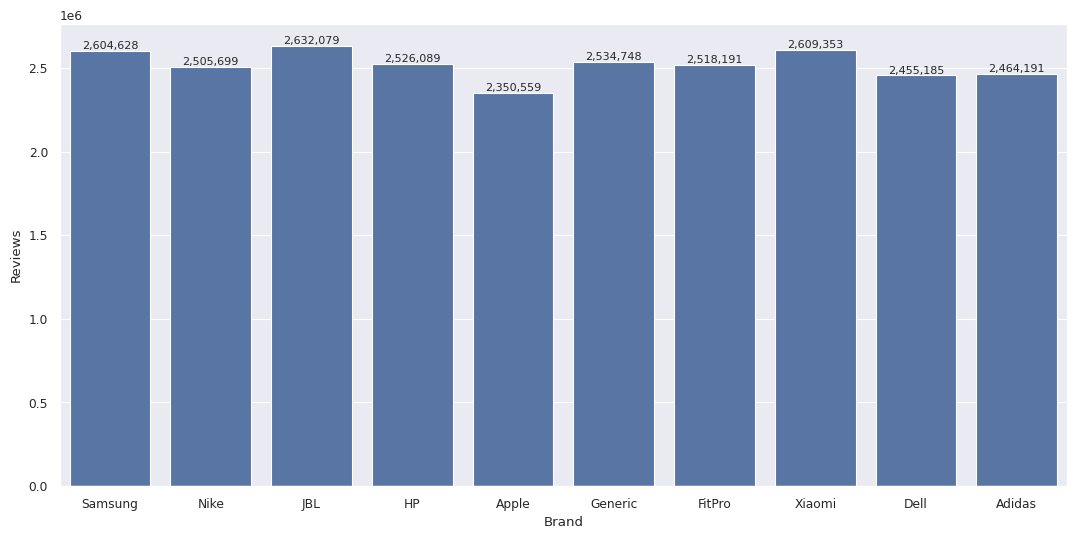

In [28]:
plt.figure(figsize=(13, 6))
ax = sns.barplot(x=df['Brand'], y=df['Reviews'], estimator = 'sum', errorbar = None)
ax.bar_label(ax.containers[0],fontsize=8, fmt='{:,.0f}')#fmt='{:,.0f}' untuk mendapatkan separasi ribuan pada angka di grafik
sns.set_context('paper')

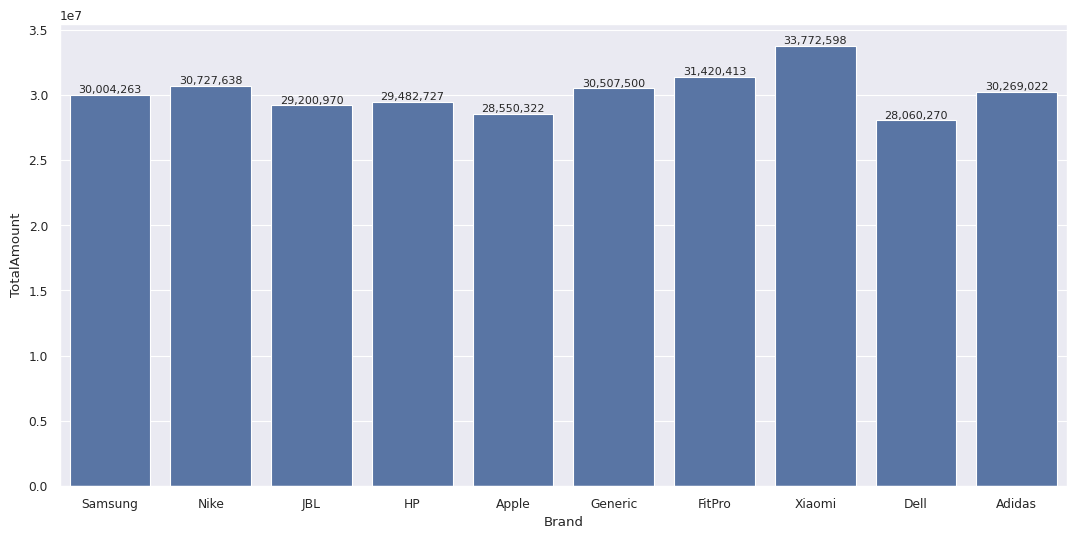

In [29]:
plt.figure(figsize=(13, 6))
ax= sns.barplot(x=df['Brand'], y=df['TotalAmount'], estimator = 'sum', errorbar = None)
ax.bar_label(ax.containers[0],fontsize=8, fmt='{:,.0f}')#fmt='{:,.0f}' untuk mendapatkan separasi ribuan pada angka di grafik
sns.set_context('paper')

Meskipun JBL mempunyai jumlah penjualan tertinggi tetapi nilai penjualan tertinggi adalah Xiamoi

<Axes: xlabel='Month', ylabel='Brand'>

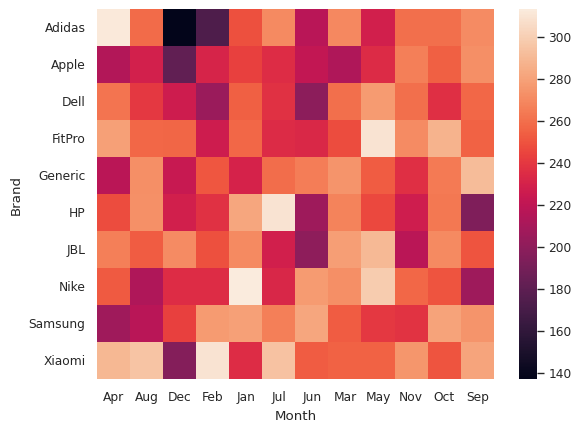

In [30]:
df1_pivot = pd.pivot_table (df, index = ['Brand'], columns= ['Month'], values = 'Quantity', aggfunc= 'sum')

sns.heatmap(df1_pivot, annot=None)

Kesimpulan : produk brand Adidas hanya mempunyai total penjualan paling kecil di bulan desember kemudian februari tetapi tidak di bulan-bulan lainnya. Dan peta penjualan hampir semua brand terlihat lebih rendah dibulan desember, feb.
Produk yang mempunyai jumlah penjualan yang paling tinggi adalah NIKE, HP, FitPro


<Axes: xlabel='Month', ylabel='Category'>

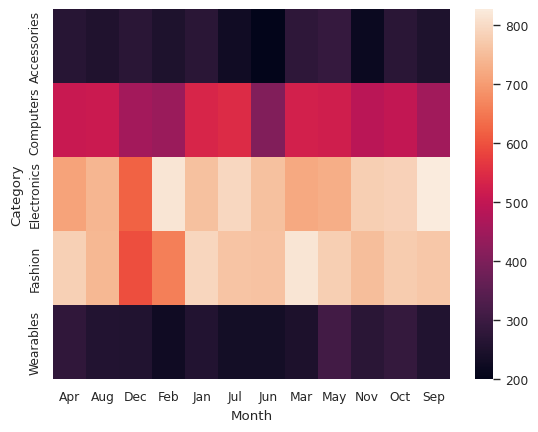

In [31]:
df1_pivot = pd.pivot_table (df, index = ['Category'], columns= ['Month'], values = 'Quantity', aggfunc= 'sum')

sns.heatmap(df1_pivot, annot=None)

Kesimpulan : dari data terlihat category produk wearables kemudian accecories mempunyai quantity penjualan paling rendah dibandingkan dengan category lainnya selama bulan data. Yang ketiga adalah computers. Fasion mempunyai penjualan paling tinggi dibulan maret dan electronik mempunyai penjualan tertinggi di bulan Feb

<Axes: xlabel='City', ylabel='Category'>

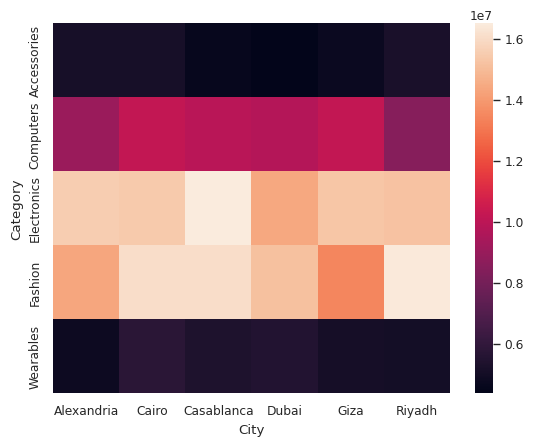

In [32]:
df1_pivot = pd.pivot_table (df, index = ['Category'], columns= ['City'], values = 'TotalAmount', aggfunc= 'sum')

sns.heatmap(df1_pivot, annot=None)

<Axes: xlabel='City', ylabel='Brand'>

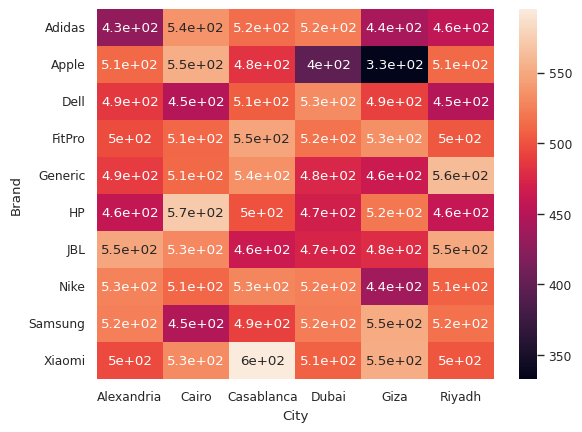

In [33]:
df1_pivot = pd.pivot_table (df, index = ['Brand'], columns= ['City'], values = 'Quantity', aggfunc= 'sum')

sns.heatmap(df1_pivot, annot=True)

<Axes: xlabel='City', ylabel='Brand'>

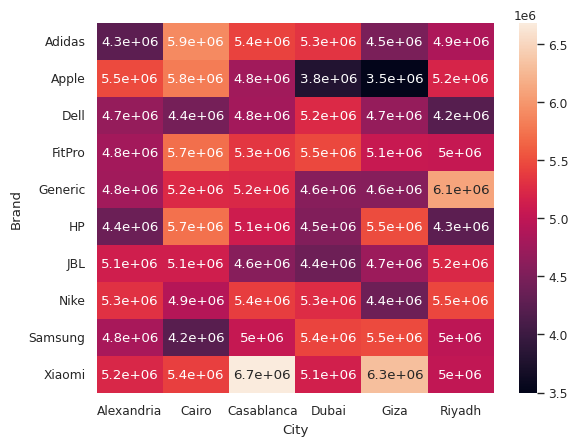

In [34]:
df1_pivot = pd.pivot_table (df, index = ['Brand'], columns= ['City'], values = 'TotalAmount', aggfunc= 'sum')
sns.heatmap(df1_pivot, annot=True)

Kota yang mempunyai quantity penjualan dan total nilai penjualan tertinggi adalah Casablanca dengan Brand Xiaomi. Sedangkan Brand yang terendah adalah Apple di kota Giza

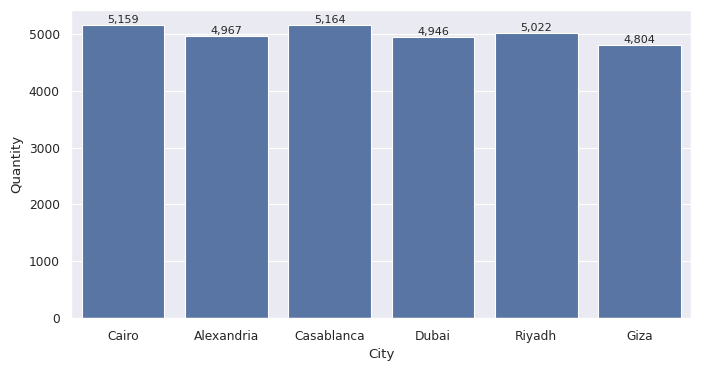

In [35]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=df['City'], y=df['Quantity'], estimator = 'sum', errorbar = None)
ax.bar_label(ax.containers[0],fontsize=8, fmt='{:,.0f}')#fmt='{:,.0f}' untuk mendapatkan separasi ribuan pada angka di grafik
sns.set_context('paper')

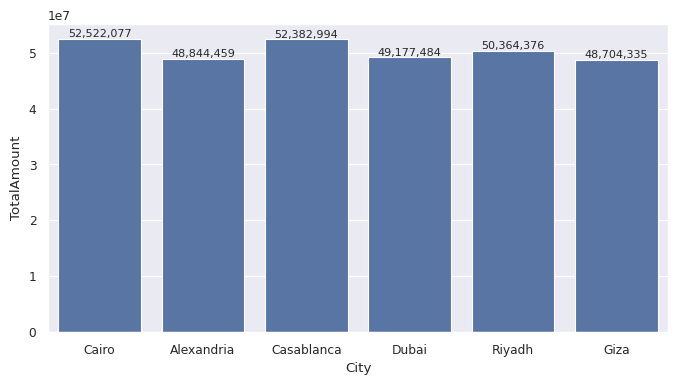

In [36]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=df['City'], y=df['TotalAmount'], estimator = 'sum', errorbar = None)
ax.bar_label(ax.containers[0],fontsize=8, fmt='{:,.0f}')#fmt='{:,.0f}' untuk mendapatkan separasi ribuan pada angka di grafik
sns.set_context('paper')

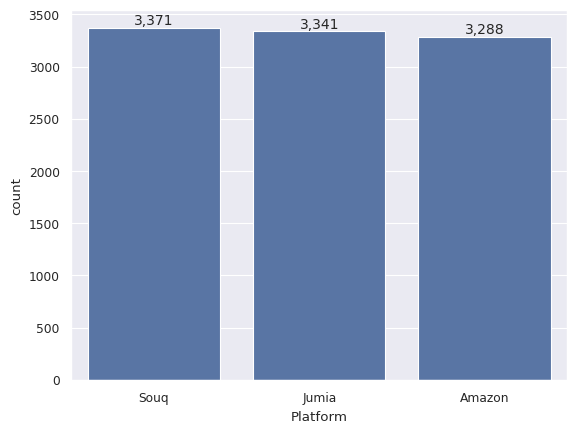

In [37]:
cx = sns.barplot(df['Platform'].value_counts())
cx.bar_label(cx.containers[0],fontsize=10, fmt='{:,.0f}')
sns.set_context('paper') #mengatur ukuran huruf (pilihan : paper, notebook, talk, poster)

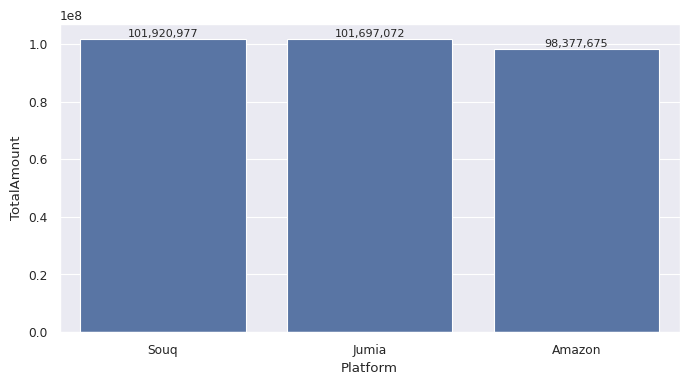

In [38]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=df['Platform'], y=df['TotalAmount'], estimator = 'sum', errorbar = None)
ax.bar_label(ax.containers[0],fontsize=8, fmt='{:,.0f}')#fmt='{:,.0f}' untuk mendapatkan separasi ribuan pada angka di grafik
sns.set_context('paper')

<Axes: xlabel='Platform', ylabel='Brand'>

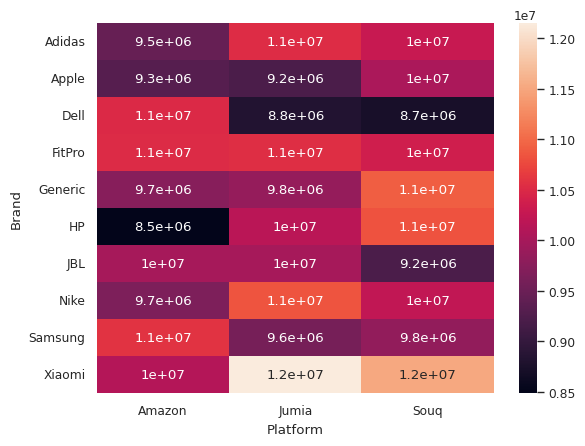

In [39]:
df1_pivot = pd.pivot_table (df, index = ['Brand'], columns= ['Platform'], values = 'TotalAmount', aggfunc= 'sum')
sns.heatmap(df1_pivot, annot=True)

#Kesimpulan



*   Produk dengan unit tertinggi penjualan adalah JBL dan terendah adalah Apple
*   Nilai transaksi penjualan tertinggi adalah Xiaomi dan nilai transaksi penjualan terendaha adalah Dell

*   Category produk tertinggi penjualan adalah electronics dan yang terendah adalah wearables
*   Kota dengan unit penjualan tertinggi dan nilai penjualan tertinggi adalah Casablanca dengan brand yang terjual terbanyak adalah Xiaomi

*   Xiaomi banyak terjual di beberapa kota yaitu Casablanca dan Giza dan platform yang sering dipakai adalah Jumia Platform
*   JBL penjualan tertinggi ada di Dubai.

*   Apple penjualan terendah ada di kota Giza dan Dubai
*   Kota dengan unit penjualan tertinggi dan nilai penjualan tertinggi adalah Casablanca dan yang terendah untuk unit terjual dan nilai penjualan adalah Giza

*   Performa platform e-commerce tertinggi adalah Souq dan terendah adalah Amazon baik dari jumlah unit atau nilai transaksinya.











